In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

1. Input Data

In [131]:
# # example D_ik
data = [[2, 2, 1, 2, 2, 1, 3],
        [2, 2, 2, 2, 2, 1, 3],
        [2, 6, 4, 2, 2, 4, 3],
        [2, 6, 4, 0, 2, 4, 3],
        [2, 6, 3, 2, 0, 2, 3],
        [2, 6, 3, 2, 0, 3, 3],
        [2, 6, 3, 0, 0, 2, 3],
        [2, 6, 3, 0, 0, 3, 3],
        [2, 6, 3, 2, 0, 3, 3],
        [2, 6, 3, 0, 0, 2, 3]]

D_ik = pd.DataFrame(data,
                    columns=['Register', 'MR', 'US', 'CT',
                             'Meal', 'Interpretation', 'Consultation'],
                    index=range(1, len(data)+1))
D_ik


,Register,MR,US,CT,Meal,Interpretation,Consultation
1,2,2,1,2,2,1,3
2,2,2,2,2,2,1,3
3,2,6,4,2,2,4,3
4,2,6,4,0,2,4,3
5,2,6,3,2,0,2,3
6,2,6,3,2,0,3,3
7,2,6,3,0,0,2,3
8,2,6,3,0,0,3,3
9,2,6,3,2,0,3,3
10,2,6,3,0,0,2,3


In [132]:
O_E_K = pd.DataFrame(data=[[41], [39], [41], [33], [41], [39], [41]],
             columns = ['End_Period'],
             index=[1,2,3,4,5,6,7])
O_E_K

,End_Period
1,41
2,39
3,41
4,33
5,41
6,39
7,41


In [133]:
# example schedule_data
schedule_data = [[1, 1, 15],
                 [1, 3, 17],
                 [1, 4, 18],
                 [1, 2, 20],
                 [1, 5, 22],
                 [1, 6, 22],
                 [1, 7, 24],
                 [2, 1, 1],
                 [2, 2, 3],
                 [2, 3, 5],
                 [2, 4, 7],
                 [2, 6, 8],
                 [2, 5, 9],
                 [2, 7, 11],
                 [3, 1, 11],
                 [3, 2, 13],
                 [3, 3, 19],
                 [3, 4, 23],
                 [3, 6, 24],
                 [3, 5, 26],
                 [3, 7, 28],
                 [4, 1, 2],
                 [4, 2, 4],
                 [4, 3, 10],
                 [4, 6, 14],
                 [4, 5, 16],
                 [4, 7, 18],
                 [5, 1, 4],
                 [5, 2, 6],
                 [5, 3, 12],
                 [5, 4, 15],
                 [5, 6, 15],
                 [5, 7, 17],
                 [6, 1, 16],
                 [6, 2, 18],
                 [6, 3, 24],
                 [6, 6, 27],
                 [6, 4, 28],
                 [6, 7, 30],
                 [7, 1, 21],
                 [7, 2, 23],
                 [7, 3, 29],
                 [7, 6, 32],
                 [7, 7, 34],
                 [8, 1, 21],
                 [8, 3, 23],
                 [8, 2, 26],
                 [8, 6, 32],
                 [8, 7, 35],
                 [9, 1, 9],
                 [9, 2, 11],
                 [9, 3, 17],
                 [9, 6, 20],
                 [9, 4, 21],
                 [9, 7, 23],
                 [10, 1, 25],
                 [10, 3, 27],
                 [10, 2, 30],
                 [10, 6, 36],
                 [10, 7, 38]]


In [134]:
# example D_ik
# D_ik = pd.DataFrame(data=[[6,18,3,0,4,2,8], [6,18,10,4,0,9,8]],
#              columns = ['Register','MR','US','CT','Meal','Interpretation','Consultation'],
#              index=[1,2])
# D_ik

In [135]:
# example schedule_data
# schedule_data = [[1, 1, 65],
#  [1, 3, 71],
#  [1, 2, 74],
#  [1, 6, 76],
#  [1, 7, 92],
#  [1, 5, 100],
#  [2, 1, 2],
#  [2, 4, 8],
#  [2, 3, 12],
#  [2, 2, 22],
#  [2, 6, 28],
#  [2, 7, 40]]

2. Patient's Gantt

In [136]:
def visualize_patient_gantt(schedule_data, D_ik, time_period):
    # define colors
    colors = {
        1: 'tab:cyan',
        2: 'green',
        3: 'tab:red',
        4: 'yellow',
        5: 'tab:purple',
        6: 'orange',
        7: 'pink'
    }

    # create a dictionary to store patient data
    patient_data_dict = {}
    for data in schedule_data:
        patient_no = data[0]
        checkup = data[1]  # Use index 1 to get the checkup
        time = data[2]

        if patient_no not in patient_data_dict:
            patient_data_dict[patient_no] = []

        patient_data_dict[patient_no].append({'checkup': checkup, 'time': time})

    # get unique patients
    patients = list(patient_data_dict.keys())

    # create subplots for each patient
    fig, ax = plt.subplots(len(patients), 1, sharex=True, figsize=(10, len(patients)))

    # process each patient's data
    for idx, patient in enumerate(patients):
        patient_data = patient_data_dict[patient]
        # generate segments for time slots and colors
        segments = []
        for data in patient_data:
            no = patient
            checkup = data['checkup']
            color = colors[checkup]  # Use colors dictionary to get the color
            start_time = data['time']
            if data['checkup'] == 1:
              end_time = start_time + D_ik.at[no,'Register']
            elif data['checkup'] == 2:
              end_time = start_time + D_ik.at[no,'MR']
            elif data['checkup'] == 3:
              end_time = start_time + D_ik.at[no,'US']
            elif data['checkup'] == 4:
              end_time = start_time + D_ik.at[no,'CT']
            elif data['checkup'] == 5:
              end_time = start_time + D_ik.at[no,'Meal']
            elif data['checkup'] == 6:
              end_time = start_time + 0
            elif data['checkup'] == 7:
              end_time = start_time + D_ik.at[no,'Consultation']
            else:
              end_time = start_time + 1
            segments.append((start_time, end_time, color))

        # draw gantt chart
        for segment in segments:
            ax[idx].barh(0, left=segment[0], width=segment[1] - segment[0], color=segment[2], height=0.5, align='center')

        # set y axis labels for each patient
        ax[idx].set_yticks([0])
        ax[idx].set_yticklabels([f'Patient {patient}'])
        ax[idx].set_ylim(-0.5, 0.5)

        # remove x axis labels for all but the last subplot
        if idx < len(patients) - 1:
            plt.setp(ax[idx].get_xticklabels(), visible=False)

    # set x axis labels
    x_ticks = np.arange(0, time_period + 1, 1)
    plt.xticks(x_ticks)
    plt.xlabel('Time')

    # define checkup information
    checkup_info = {
        1: {'color': 'tab:cyan', 'name': 'Register'},
        2: {'color': 'green', 'name': 'MR'},
        3: {'color': 'tab:red', 'name': 'US'},
        4: {'color': 'yellow', 'name': 'CT'},
        5: {'color': 'tab:purple', 'name': 'Meal'},
#        6: {'color': 'orange', 'name': 'Interpretation'},
        7: {'color': 'pink', 'name': 'Consultation'}
    }

    # add legend
    legend_patches = [mpatches.Patch(color=info['color'], label=info['name']) for info in checkup_info.values()]
    plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()


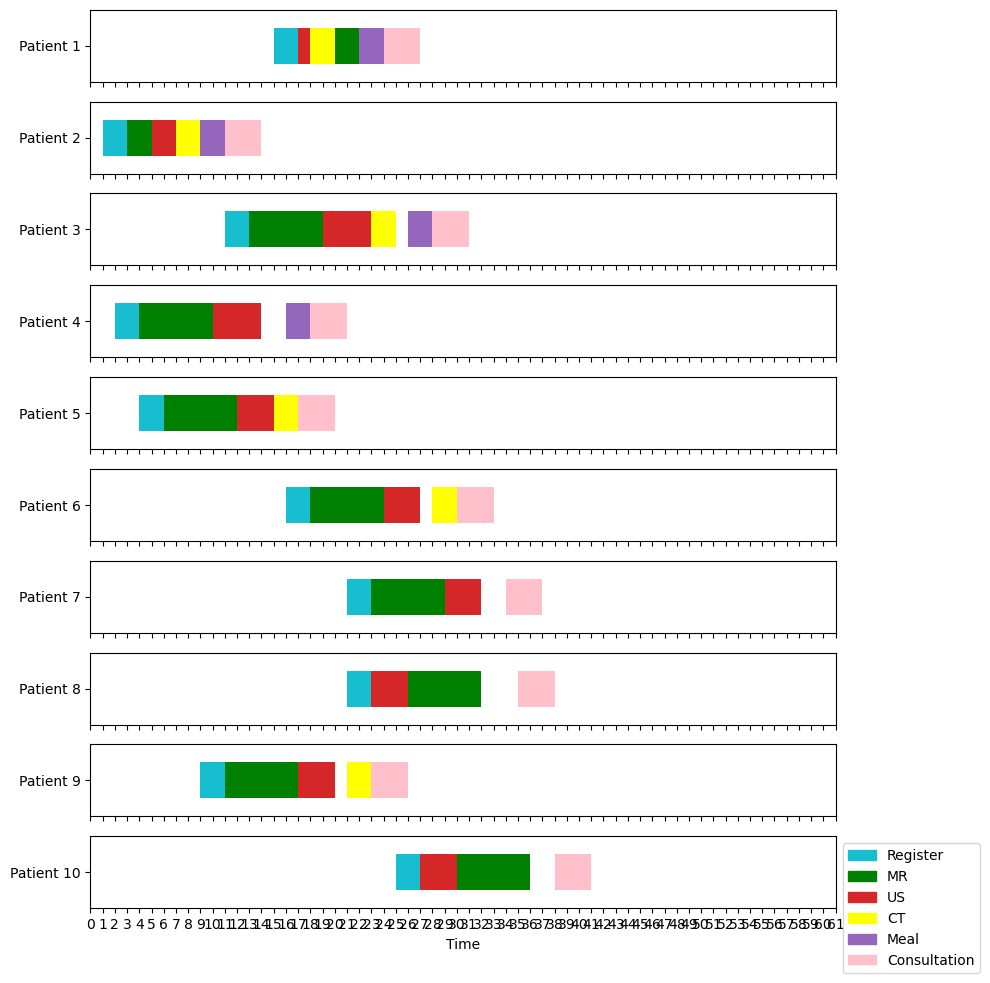

In [137]:
visualize_patient_gantt(schedule_data, D_ik, 61)

3. Checkup's Gantt

In [138]:
def adjust_schedule(schedule_data, D_ik):
    adjusted_schedule_data = []

    # sort data
    schedule_data.sort(key=lambda x: (x[1], x[2]))

    for i, entry in enumerate(schedule_data):
        if i > 0 and entry[1] == schedule_data[i - 1][1] and (entry[2] >= schedule_data[i - 1][2]
                      and entry[2] < 1 + schedule_data[i - 1][2] + D_ik.iloc[schedule_data[i - 1][0]-1, schedule_data[i - 1][1]-1]):
                      # add 1 buffer per 15 min
            entry[1] += 7
        adjusted_schedule_data.append(entry)

#    print(adjusted_schedule_data)

    return adjusted_schedule_data

In [139]:
def visualize_machine_gantt(schedule_data, D_ik, time_period):
    # define colors
    colors = {
        0: 'black', # end period time
        1: 'tab:cyan',
        2: 'green',
        3: 'red',
        4: 'yellow',
        5: 'tab:purple',
        6: 'orange',
        7: 'pink',
        8: 'tab:blue',
        9: 'tab:orange',
        10: 'tab:green',
        11: 'tab:red',
        12: 'tab:gray'
    }

    # create a dictionary to store patient data
    patient_data_dict = {}
    for data in schedule_data:
        checkup_no = data[1]
        patient = data[0]  # Use index 1 to get the checkup
        time = data[2]

        if checkup_no not in patient_data_dict:
            patient_data_dict[checkup_no] = []

        patient_data_dict[checkup_no].append({'patient': patient, 'time': time})

    # get unique checkups
    checkups = list(patient_data_dict.keys())

    # create subplots for each checkups
    fig, ax = plt.subplots(len(checkups), 1, sharex=True, figsize=(10, len(checkups)))

    # process each checkup's data
    for idx, checkup in enumerate(checkups):
        checkup_data = patient_data_dict[checkup]
        # generate segments for time slots and colors
        segments = []
        for data in checkup_data:
            no = checkup
            patient = data['patient']
            color = colors[patient]  # Use colors dictionary to get the color
            start_time = data['time']
            if patient == 0: # end period time
              end_time = start_time + 0.1
            elif no == 1 or no == 8 or no == 15:
              end_time = start_time + D_ik.at[patient,'Register']
            elif no == 2 or no == 9 or no == 16:
              end_time = start_time + D_ik.at[patient,'MR']
            elif no == 3 or no == 10 or no == 17:
              end_time = start_time + D_ik.at[patient,'US']
            elif no == 4 or no == 11 or no == 18:
              end_time = start_time + D_ik.at[patient,'CT']
            elif no == 5 or no == 12 or no == 19 or no == 26:
              end_time = start_time + D_ik.at[patient,'Meal']
            elif no == 6 or no == 13 or no == 20 or no == 27:
              end_time = start_time + D_ik.at[patient,'Interpretation']
            elif no == 7 or no == 14 or no == 21 or no == 28:
              end_time = start_time + D_ik.at[patient,'Consultation']
#            else:
#              end_time = start_time + 0.1
            segments.append((start_time, end_time, color, patient))

        # draw gantt chart
        for segment in segments:

            # end period time
            if segment[3] == 0:
              ax[idx].barh(0, left=segment[0], width=0.1, color=segment[2], height=0.8, align='center')
              continue

            ax[idx].barh(0, left=segment[0], width=segment[1] - segment[0], color=segment[2], height=0.5, align='center')

            # draw patients' number in gantt
            label_x = (segment[0] + segment[1]) / 2
            patient_number = segment[3]
            ax[idx].text(label_x, 0, str(patient_number), color='black', ha='center', va='center')

        # define checkups
        checkups = {
            1: 'Register1',
            2: 'MR1',
            3: 'US1',
            4: 'CT1',
            5: 'Meal1',
            6: 'Interpretation1',
            7: 'Consultation1',
            8: 'Register2',
            9: 'MR2',
            10: 'US2',
            11: 'CT2',
            12: 'Meal2',
            13: 'Interpretation2',
            14: 'Consultation2',
            15: 'Register3',
            16: 'MR3',
            17: 'US3',
            18: 'CT3',
            19: 'Meal3',
            20: 'Interpretation3',
            21: 'Consultation3',
            26: 'Meal4',
            27: 'Interpretation4',
            28: 'Consultation4'
        }

        # set y axis labels for each checkup
        ax[idx].set_yticks([0])
        y_name = checkups[checkup]
        ax[idx].set_yticklabels([y_name])
        ax[idx].set_ylim(-0.5, 0.5)

        # remove x axis labels for all but the last subplot
#        if idx < len(checkups) - 1:
#            plt.setp(ax[idx].get_xticklabels(), visible=True)

    # set x axis labels
    x_ticks = np.arange(0, time_period + 1, 1)
    plt.xticks(x_ticks)
    plt.xlabel('Time')

    # define patient information
    patient_info = {
        0: {'color': 'black', 'name': 'End_Period'}, # end period time
        1: {'color': 'tab:cyan', 'name': 'Patient1'},
        2: {'color': 'green', 'name': 'Patient2'},
        3: {'color': 'red', 'name': 'Patient3'},
        4: {'color': 'yellow', 'name': 'Patient4'},
        5: {'color': 'tab:purple', 'name': 'Patient5'},
        6: {'color': 'orange', 'name': 'Patient6'},
        7: {'color': 'pink', 'name': 'Patient7'},
        8: {'color': 'tab:blue', 'name': 'Patient8'},
        9: {'color': 'tab:orange', 'name': 'Patient9'},
        10: {'color': 'tab:green', 'name': 'Patient10'},
        11: {'color': 'tab:red', 'name': 'Patient11'},
#        12: {'color': 'tab:gray', 'name': 'Patient12'}
    }

    # add legend
    legend_patches = [mpatches.Patch(color=info['color'], label=info['name']) for info in patient_info.values()]
    plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()


In [140]:
# extend D_ik
D_ik_extended = pd.concat([D_ik, D_ik], axis=1)
D_ik_extended = pd.concat([D_ik_extended, D_ik], axis=1)
D_ik_extended = pd.concat([D_ik_extended, D_ik], axis=1)
D_ik_extended = pd.concat([D_ik_extended, D_ik], axis=1)

In [141]:
# rearrange schedule data
a = 1
while a <= 4:
  adjusted_data = adjust_schedule(schedule_data, D_ik_extended)
  a += 1

adjusted_data.sort(key=lambda x: (x[1] % 7 == 0, x[1] % 7))
# adjusted_data

In [142]:
# rearrange adjusted data
for i, entry in enumerate(adjusted_data):
     if i > 0 and (entry[1] == 15 or entry[1] == 16 or entry[1] == 17 or entry[1] == 18):
         entry[1] -= 14
     elif i > 0 and (entry[1] == 11):
         entry[1] -= 7

# adjusted_data

In [143]:
# adjust to 3 doctors
for i, entry in enumerate(adjusted_data):
     if i > 0 and (entry[2] >= 30) and (entry[1] == 6 or entry[1] == 7):
         entry[1] += 14

# adjusted_data

In [144]:
# extend O_E_K
O_E_K_extended = pd.concat([O_E_K, O_E_K], axis=0)
O_E_K_extended = pd.concat([O_E_K_extended, O_E_K], axis=0)
O_E_K_extended = pd.concat([O_E_K_extended, O_E_K], axis=0)
O_E_K_extended = pd.concat([O_E_K_extended, O_E_K], axis=0)

# O_E_K_extended

In [145]:
# end period time
result_data = []

for idx, item in enumerate(adjusted_data):
    result_data.append(item)
    new_data = [0, adjusted_data[idx][1], O_E_K_extended.iloc[item[1]-1, 0]]
    if (idx < len(adjusted_data) - 1 and adjusted_data[idx][1] != adjusted_data[idx + 1][1]) or idx == len(adjusted_data) - 1:
        result_data.append(new_data)

# result_data

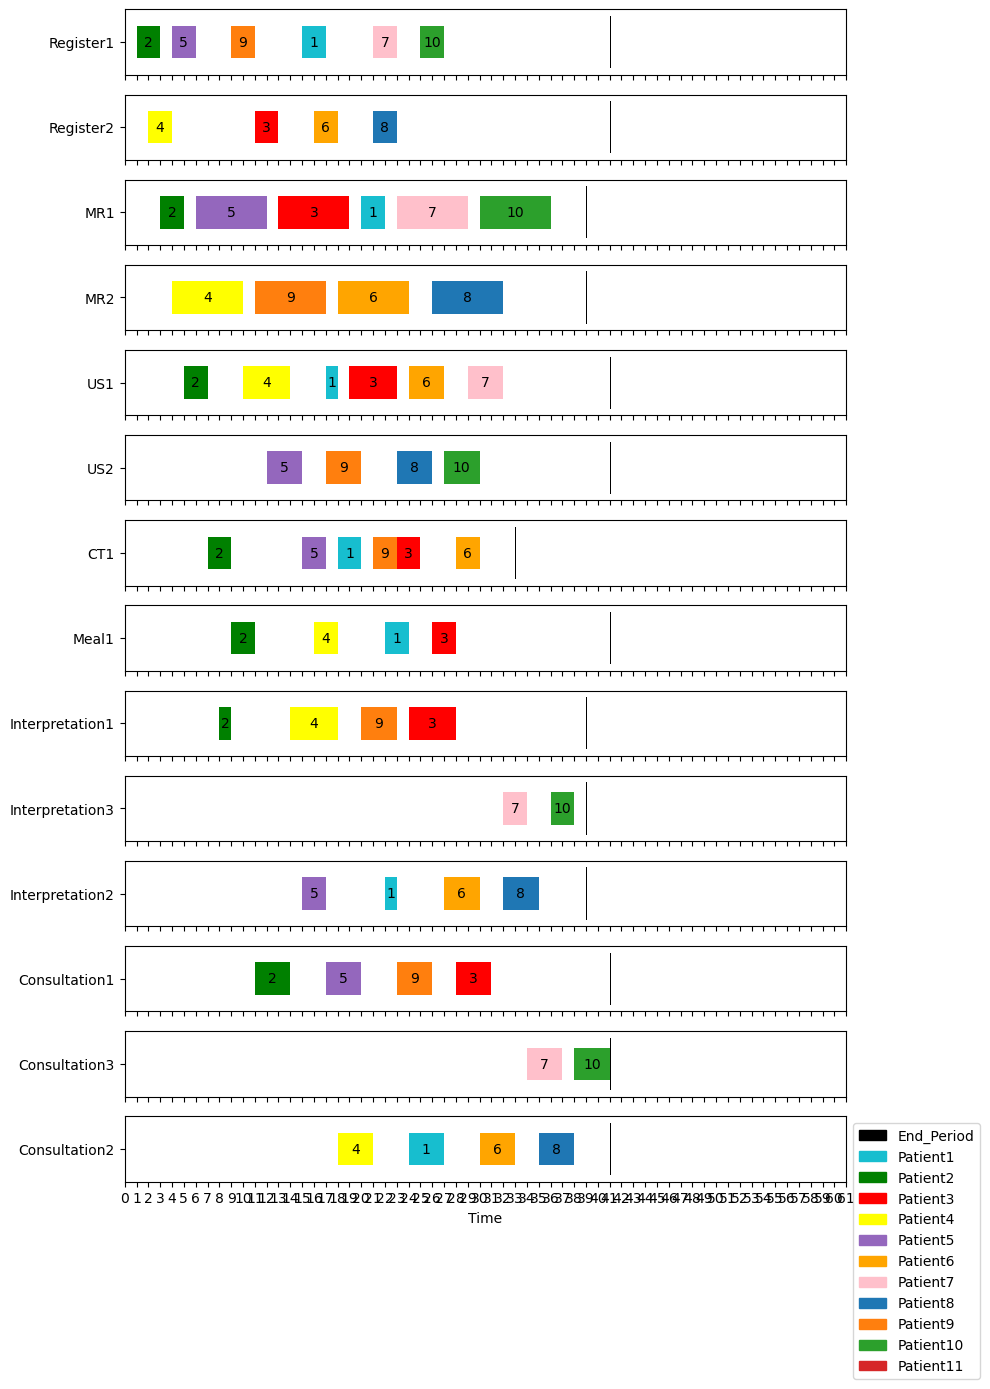

In [146]:
visualize_machine_gantt(result_data, D_ik, 61)